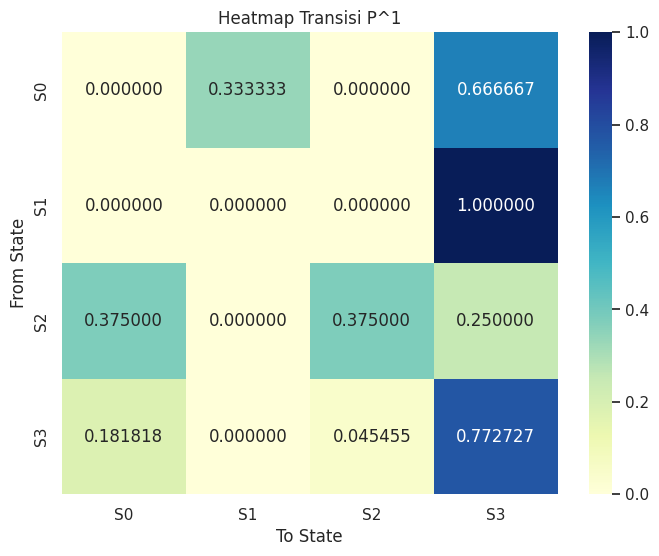

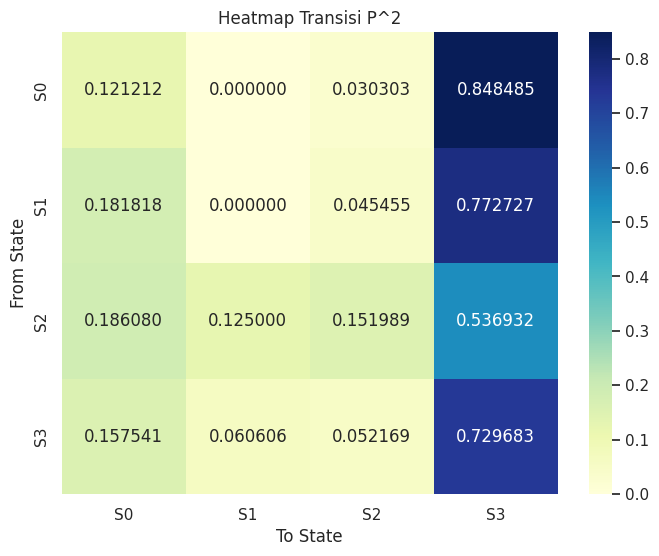

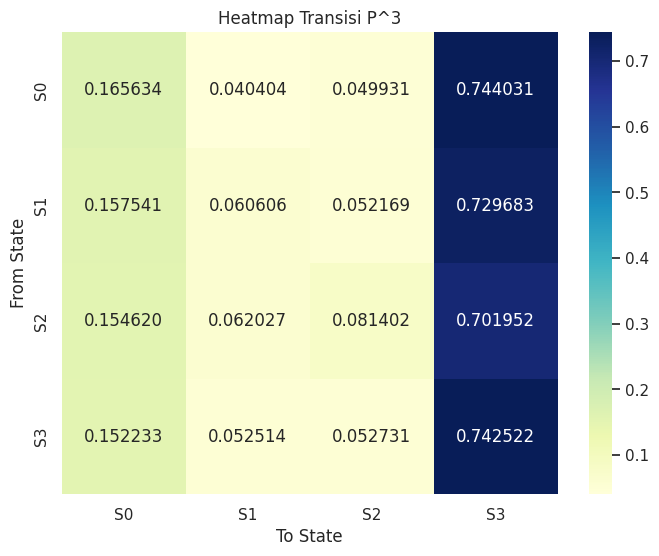

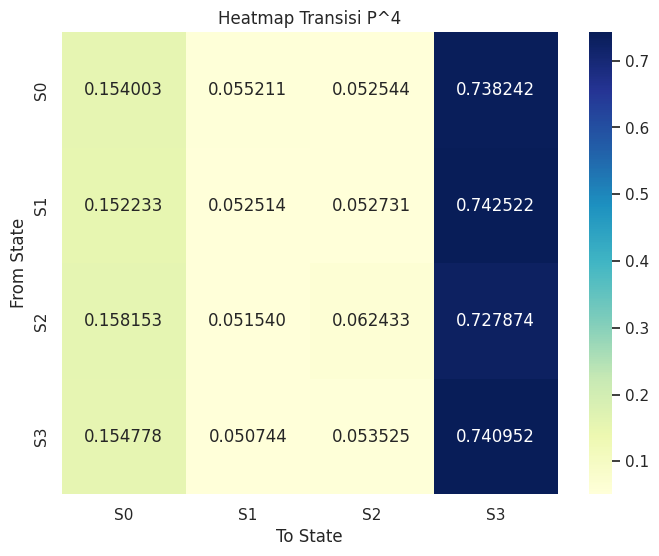

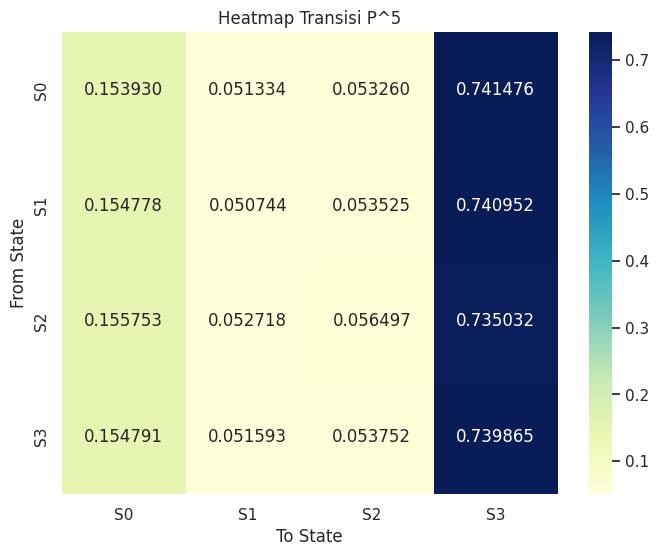

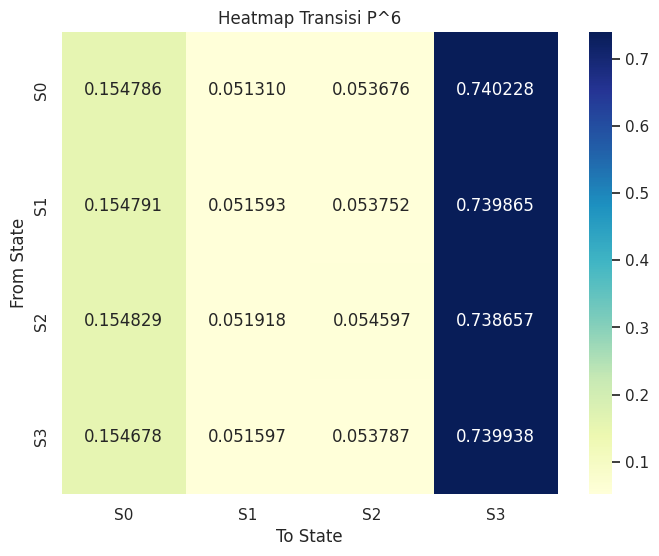

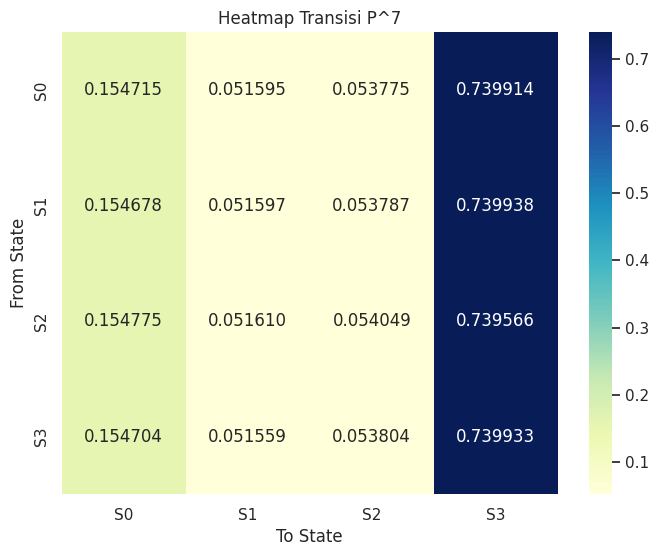

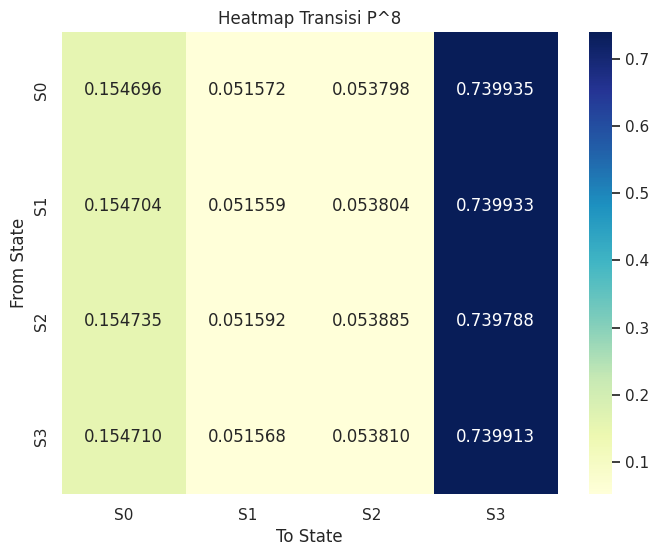

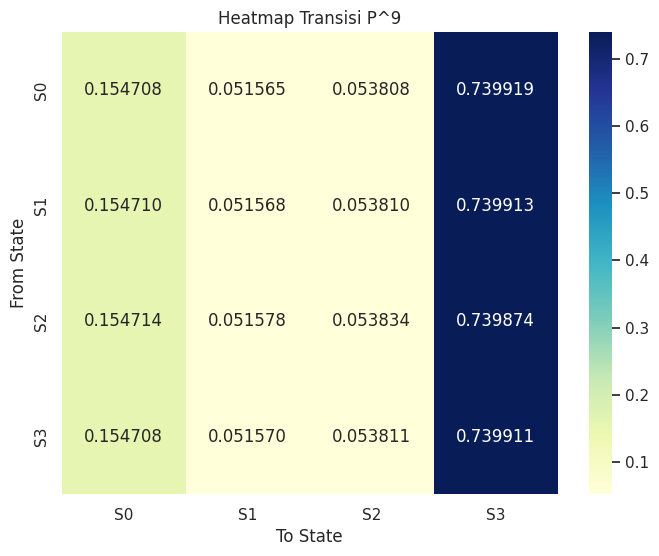

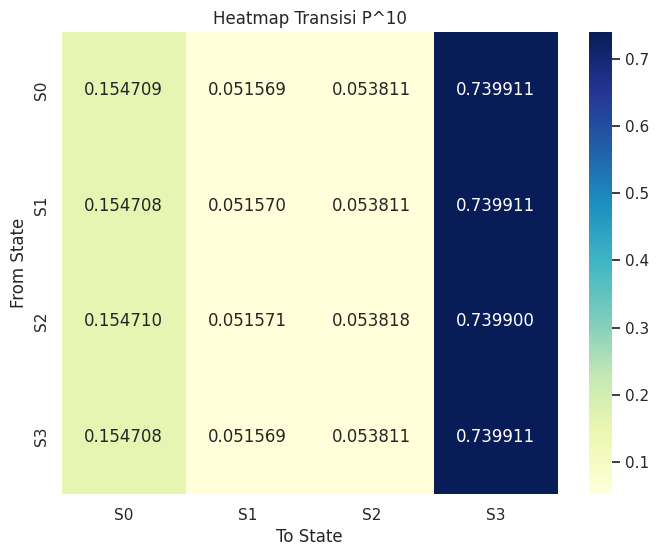

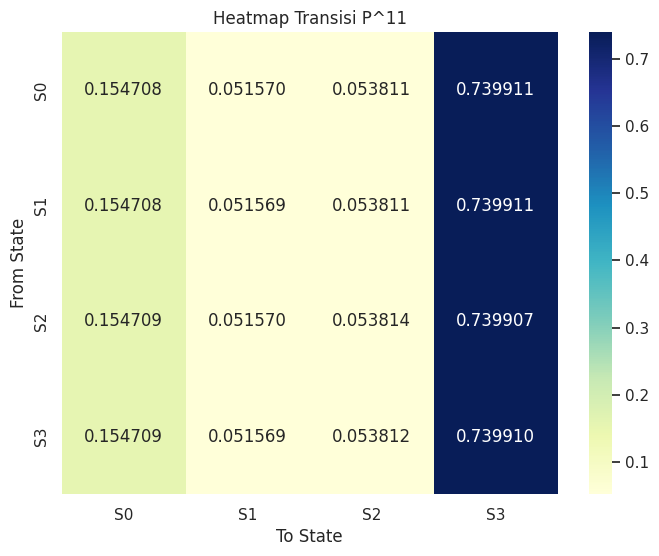

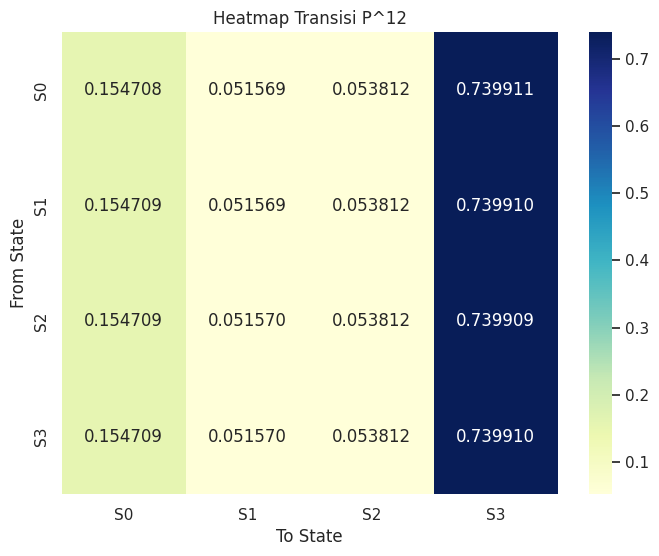

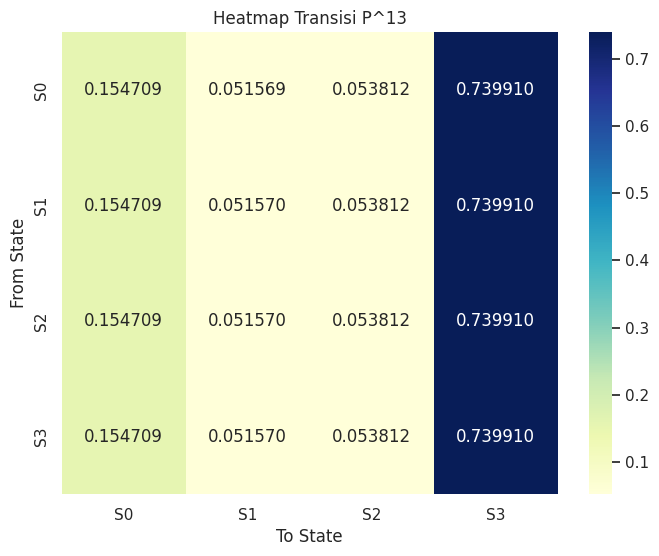

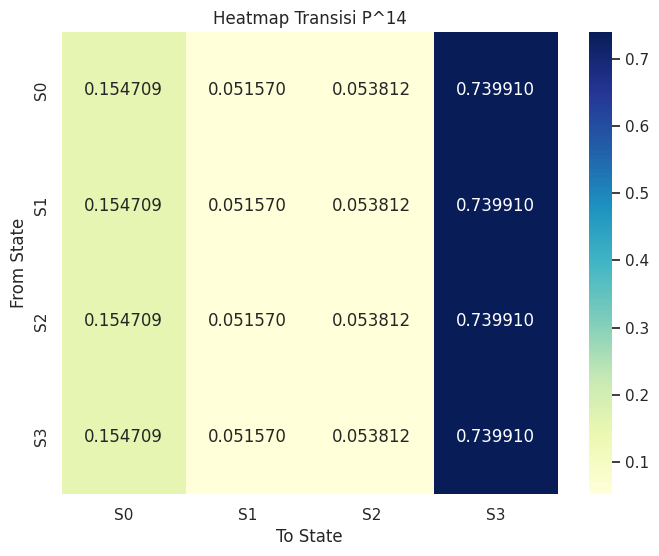


### Matriks Probabilitas dalam Keadaan Steady State (6 desimal) ###


,Steady State Probabilitas
S0,0.154709
S1,0.051570
S2,0.053812
S3,0.739910


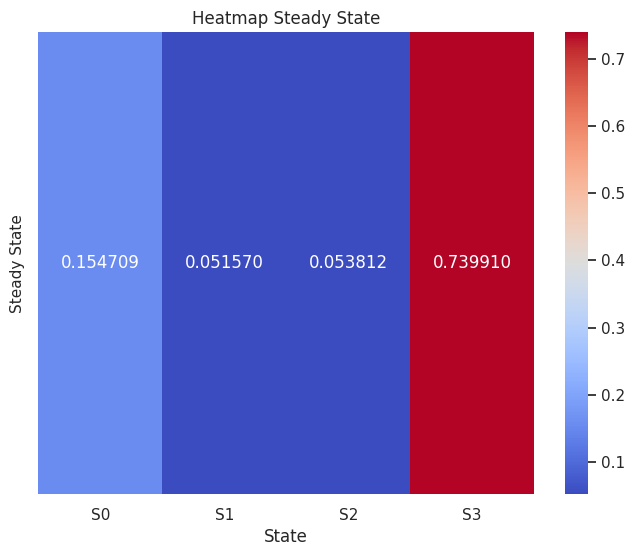

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)
pd.set_option("display.precision", 6)

# Matriks transisi satu langkah (P)
P = np.array([
    [0,     1/3,   0,     2/3],
    [0,     0,     0,     1],
    [3/8,   0,     3/8,   2/8],
    [4/22,  0,     1/22,  17/22]
])

states = ['S0', 'S1', 'S2', 'S3']
power_matrices = []
Pn = np.identity(4)

# Hitung dan simpan P^n untuk n = 1 sampai 14
for n in range(1, 15):
    Pn = np.matmul(Pn, P)
    power_matrices.append(np.round(Pn.copy(), 6))  # dibulatkan ke 6 desimal

# Fungsi visualisasi heatmap
def plot_heatmap(matrix, title):
    df = pd.DataFrame(matrix, columns=states, index=states)
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".6f", cbar=True)
    plt.title(title)
    plt.xlabel("To State")
    plt.ylabel("From State")
    plt.show()

# Tampilkan heatmap dari P^1 hingga P^14
for idx, mat in enumerate(power_matrices):
    plot_heatmap(mat, f"Heatmap Transisi P^{idx+1}")

# Hitung steady state: πP = π dan ∑π = 1
A = P.T - np.eye(4)
A = np.vstack([A, np.ones(4)])
b = np.array([0, 0, 0, 0, 1])

# Least squares solution
steady_state, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
steady_state = np.round(steady_state, 6)  # pembulatan 6 desimal

# Tampilkan tabel steady state
df_steady = pd.DataFrame(steady_state, index=states, columns=['Steady State Probabilitas'])
print("\n### Matriks Probabilitas dalam Keadaan Steady State (6 desimal) ###")
display(df_steady)

# Visualisasi heatmap steady state
sns.heatmap([steady_state], annot=True, cmap="coolwarm", xticklabels=states, yticklabels=["Steady State"], fmt=".6f")
plt.title("Heatmap Steady State")
plt.xlabel("State")
plt.show()
